Parte 3

6. Carregamento e inspeção inicial - Carregue o dataset no Pandas. - Liste tipos de dados e estatísticas descritivas (.info() e .describe()).

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('energydata_complete.csv', sep =',')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


27. Distribuição do consumo - Crie histogramas e séries temporais para a variável Appliances. - Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

In [7]:
import matplotlib.pyplot as plt

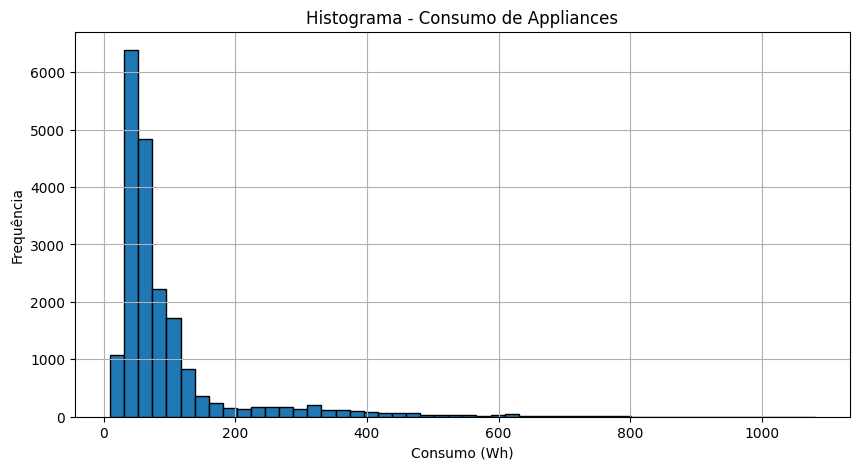

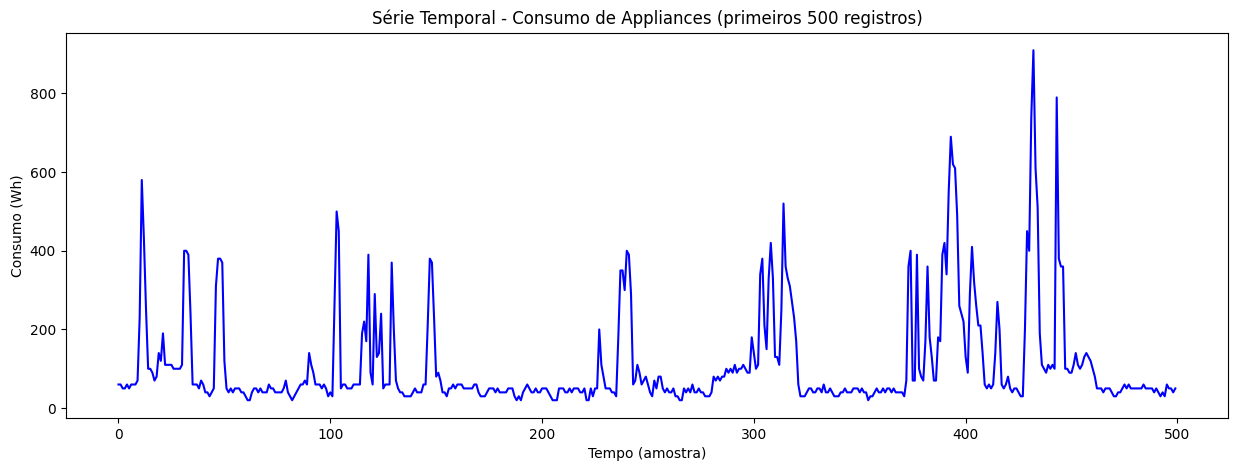

In [8]:
# Histograma do consumo de Appliances
plt.figure(figsize=(10,5))
df['Appliances'].hist(bins=50, edgecolor='black')
plt.title("Histograma - Consumo de Appliances")
plt.xlabel("Consumo (Wh)")
plt.ylabel("Frequência")
plt.show()

# Série temporal do consumo de Appliances (primeiros 500 registros)
plt.figure(figsize=(15,5))
plt.plot(df['Appliances'][:500], color='blue')
plt.title("Série Temporal - Consumo de Appliances (primeiros 500 registros)")
plt.xlabel("Tempo (amostra)")
plt.ylabel("Consumo (Wh)")
plt.show()

In [9]:
#Resposta: O consumo tende a se concentrar principalmente em valores baixos, mas com picos esporádicos em valores altos.

28. Correlações com variáveis ambientais - Calcule correlações entre Appliances e variáveis como temperatura e umidade. - Pergunta: quais fatores têm mais relação com o consumo?

In [10]:
import numpy as np
import seaborn as sns

In [11]:
df['date'] = pd.to_datetime(df['date'])
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [12]:
correlations = df.corr()['Appliances'].sort_values(ascending=False)

In [13]:
print("CORRELAÇÕES COM CONSUMO DE ENERGIA (APPLIANCES)")
print("=" * 50)
for var, corr in correlations.items():
    print(f"{var:15}: {corr:6.3f}")

CORRELAÇÕES COM CONSUMO DE ENERGIA (APPLIANCES)
Appliances     :  1.000
lights         :  0.197
T2             :  0.120
T6             :  0.118
T_out          :  0.099
Windspeed      :  0.087
RH_1           :  0.086
T3             :  0.085
T1             :  0.055
T4             :  0.040
T8             :  0.040
RH_3           :  0.036
T7             :  0.026
T5             :  0.020
RH_4           :  0.017
Tdewpoint      :  0.015
T9             :  0.010
RH_5           :  0.007
Visibility     :  0.000
date           : -0.010
rv1            : -0.011
rv2            : -0.011
Press_mm_hg    : -0.035
RH_9           : -0.051
RH_7           : -0.056
RH_2           : -0.060
RH_6           : -0.083
RH_8           : -0.094
RH_out         : -0.152


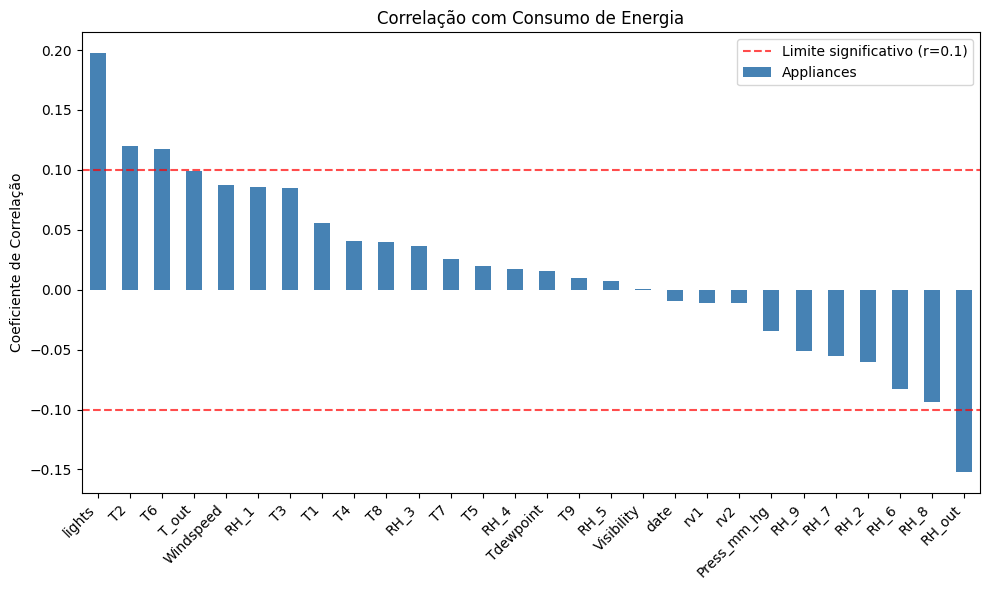

In [14]:
plt.figure(figsize=(10, 6))
correlations.drop('Appliances').plot(kind='bar', color='steelblue')
plt.axhline(y=0.1, color='r', linestyle='--', alpha=0.7, label='Limite significativo (r=0.1)')
plt.axhline(y=-0.1, color='r', linestyle='--', alpha=0.7)
plt.title('Correlação com Consumo de Energia')
plt.ylabel('Coeficiente de Correlação')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

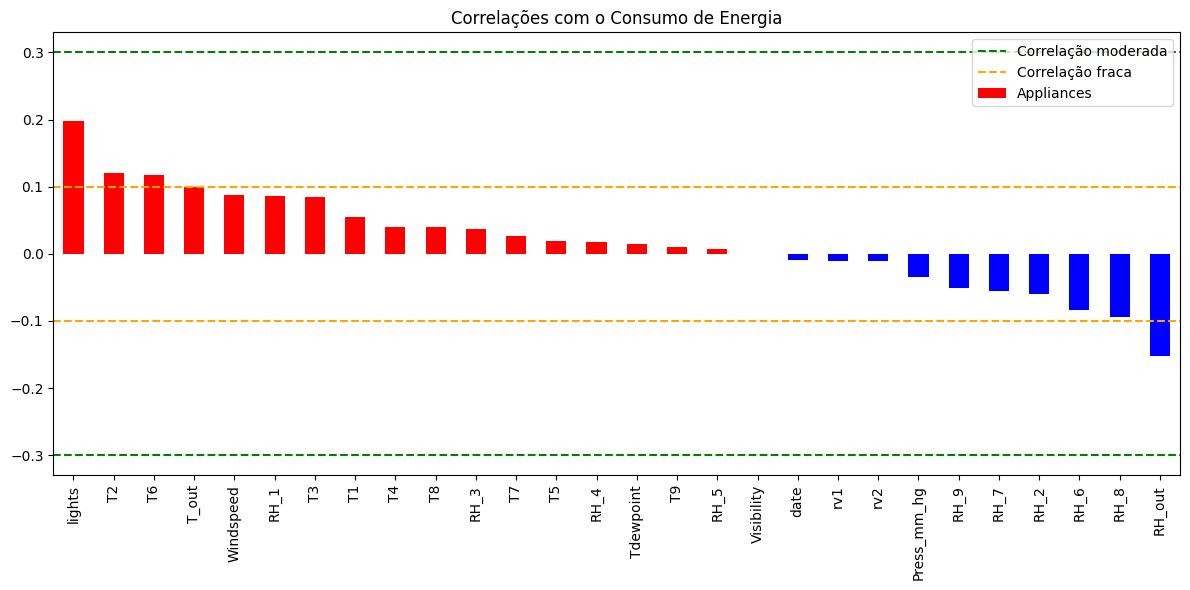

In [15]:
plt.figure(figsize=(12, 6))
correlations.drop('Appliances').plot(kind='bar', color=np.where(correlations.drop('Appliances') > 0, 'red', 'blue'))
plt.axhline(y=0.3, color='green', linestyle='--', label='Correlação moderada')
plt.axhline(y=-0.3, color='green', linestyle='--')
plt.axhline(y=0.1, color='orange', linestyle='--', label='Correlação fraca')
plt.axhline(y=-0.1, color='orange', linestyle='--')
plt.title('Correlações com o Consumo de Energia')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
#Nenhum fator de forma isolada explica o uso de energia, as variaveis não possuem um impacto forte. Mas, as que possuem maior impacto são: Temperaturas (Tout, T3, T4, T5, T7, T8), Umidade relativa (RH_1, RH_2, RH_4), Velocidade do vento (Windspeed)

29. Normalização dos dados - Aplique Min-Max Scaling às variáveis numéricas. - Reutilize esses dados em modelos posteriores.

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


30. PCA - Aplique PCA e reduza para 2 componentes principais. - Plote os dados resultantes. - Pergunta: aparecem padrões ou agrupamentos naturais?

In [19]:
from sklearn.decomposition import PCA

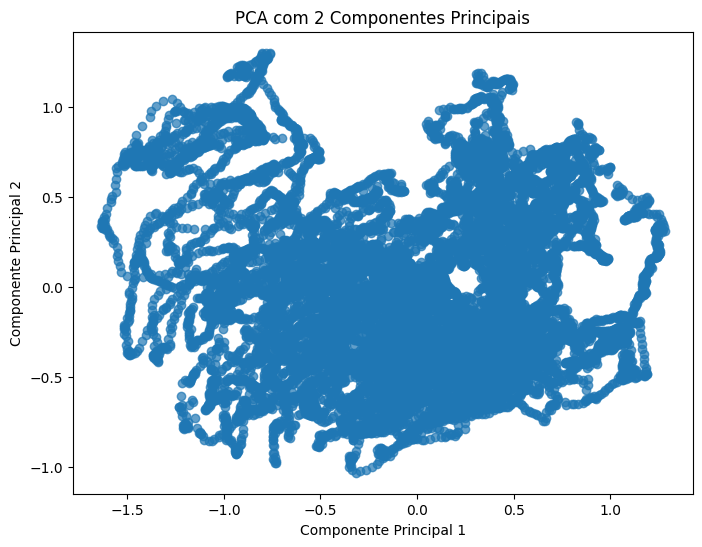

In [20]:
X = df[num_cols]

# Aplica PCA para reduzir para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Cria um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Plota os dados resultantes
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA com 2 Componentes Principais")
plt.show()

In [21]:
#Os resultados não formam grupos claros, os pontos estão mais dirpersos. Ou seja, não estão formando clusters separados.

31. Regressão Linear Múltipla - Modele Appliances em função das variáveis ambientais. - Avalie R² e erro médio.

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
X = df.drop(columns=['date', 'Appliances'])
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.1693
MAE: 0.0491
RMSE: 0.0852


32. Random Forest Regressor - Treine um modelo de Random Forest para prever Appliances. - Compare o RMSE com a regressão linear.

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
X = df.drop(columns=['Appliances', 'date'])
y = df['Appliances']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression:")
print("RMSE:", rmse_lr)
print("R²:", r2_lr)

print("\nComparação Final:")
print(f"RMSE RF: {rmse_rf:.4f} vs RMSE LR: {rmse_lr:.4f}")
print(f"R² RF: {r2_rf:.4f} vs R² LR: {r2_lr:.4f}")

Random Forest:
RMSE: 0.06399911946212065
R²: 0.5313941567585656

Linear Regression:
RMSE: 0.08521011773458764
R²: 0.16930416505473989

Comparação Final:
RMSE RF: 0.0640 vs RMSE LR: 0.0852
R² RF: 0.5314 vs R² LR: 0.1693


33. K-Means clustering - Aplique K-Means com 3 a 5 clusters. - Interprete os perfis de consumo.

In [30]:
from sklearn.cluster import KMeans

In [32]:
features = X.columns

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

df_clusters = pd.DataFrame(X, columns=features)
df_clusters['Cluster'] = clusters

cluster_profiles = df_clusters.groupby('Cluster').mean()
print(cluster_profiles)

           lights        T1      RH_1        T2      RH_2        T3      RH_3  \
Cluster                                                                         
0        0.056262  0.422876  0.302201  0.189087  0.539285  0.327849  0.418194   
1        0.031439  0.756250  0.465929  0.515663  0.634302  0.682716  0.551438   
2        0.081764  0.429812  0.459081  0.282875  0.632342  0.321801  0.683212   
3        0.041102  0.580748  0.305657  0.370853  0.485213  0.480542  0.380611   

               T4      RH_4        T5  ...        T9      RH_9     T_out  \
Cluster                                ...                                 
0        0.428751  0.373188  0.316037  ...  0.382203  0.424507  0.252775   
1        0.785498  0.611816  0.672872  ...  0.805665  0.632106  0.625956   
2        0.381482  0.707001  0.298629  ...  0.295998  0.705325  0.377838   
3        0.603322  0.368392  0.470038  ...  0.575521  0.393224  0.483507   

         Press_mm_hg    RH_out  Windspeed  Visibility  T

34. Classificação binária - Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana). - Treine Logistic Regression e Random Forest Classifier.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [41]:
mediana_appliances = df['Appliances'].median()
df['consumo_alto'] = (df['Appliances'] > mediana_appliances).astype(int)

X = df.drop(['date', 'Appliances', 'consumo_alto', 'rv1', 'rv2'], axis=1)
y = df['consumo_alto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("TREINANDO MODELOS DE CLASSIFICAÇÃO")
print("=" * 50)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\n RESULTADOS DOS MODELOS")
print("=" * 50)
print(f"Logistic Regression: {acc_lr:.3f}")
print(f"Random Forest:       {acc_rf:.3f}")

print("\n RELATÓRIO DETALHADO - RANDOM FOREST")
print("=" * 50)
print(classification_report(y_test, y_pred_rf, target_names=['Baixo Consumo', 'Alto Consumo']))

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importância': rf_model.feature_importances_
}).sort_values('Importância', ascending=False)

print("\n TOP 10 FEATURES MAIS IMPORTANTES")
print("=" * 50)
print(feature_importance.head(10).to_string(index=False))

print("\n MATRIZ DE CONFUSÃO - RANDOM FOREST")
print("=" * 50)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(f"Verdadeiros Negativos: {conf_matrix[0,0]}")
print(f"Falsos Positivos:      {conf_matrix[0,1]}")
print(f"Falsos Negativos:      {conf_matrix[1,0]}")
print(f"Verdadeiros Positivos: {conf_matrix[1,1]}")

TREINANDO MODELOS DE CLASSIFICAÇÃO

 RESULTADOS DOS MODELOS
Logistic Regression: 0.761
Random Forest:       0.901

 RELATÓRIO DETALHADO - RANDOM FOREST
               precision    recall  f1-score   support

Baixo Consumo       0.91      0.91      0.91      3223
 Alto Consumo       0.89      0.89      0.89      2698

     accuracy                           0.90      5921
    macro avg       0.90      0.90      0.90      5921
 weighted avg       0.90      0.90      0.90      5921


 TOP 10 FEATURES MAIS IMPORTANTES
    Feature  Importância
     lights     0.066372
       RH_8     0.065670
         T2     0.062838
       RH_9     0.054237
     RH_out     0.052021
       RH_6     0.046776
       RH_1     0.044583
       RH_5     0.044044
Press_mm_hg     0.043053
         T6     0.042475

 MATRIZ DE CONFUSÃO - RANDOM FOREST
Verdadeiros Negativos: 2933
Falsos Positivos:      290
Falsos Negativos:      298
Verdadeiros Positivos: 2400


35. Avaliação de classificação - Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score). - Pergunta: o modelo erra mais para alto ou para baixo consumo?

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [45]:
mediana_appliances = df['Appliances'].median()
df['consumo_alto'] = (df['Appliances'] > mediana_appliances).astype(int)

X = df.drop(['date', 'Appliances', 'consumo_alto', 'rv1', 'rv2'], axis=1)
y = df['consumo_alto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(" AVALIAÇÃO DOS MODELOS DE CLASSIFICAÇÃO")
print("=" * 55)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

def calcular_metricas(y_true, y_pred, nome_modelo):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n{nome_modelo.upper()}")
    print("-" * 30)
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    print(f"\nMatriz de Confusão:")
    print(f"TN: {cm[0,0]} | FP: {cm[0,1]}")
    print(f"FN: {cm[1,0]} | TP: {cm[1,1]}")


    erros_alto = cm[0,1]
    erros_baixo = cm[1,0]

    print(f"\nAnálise de Erros:")
    print(f"Erros para ALTO consumo (FP): {erros_alto}")
    print(f"Erros para BAIXO consumo (FN): {erros_baixo}")

    if erros_alto > erros_baixo:
        print("O modelo erra MAIS para ALTO consumo")
    elif erros_baixo > erros_alto:
        print("O modelo erra MAIS para BAIXO consumo")
    else:
        print("O modelo erra igualmente para ambos os tipos")

    return cm

print(" RESULTADOS COMPLETOS")
print("=" * 55)

cm_lr = calcular_metricas(y_test, y_pred_lr, "Logistic Regression")
print("\n" + "=" * 55)
cm_rf = calcular_metricas(y_test, y_pred_rf, "Random Forest")

print("\n" + "=" * 55)
print("RELATÓRIO DETALHADO - RANDOM FOREST")
print("=" * 55)
print(classification_report(y_test, y_pred_rf, target_names=['Baixo Consumo', 'Alto Consumo']))

print("\n" + "=" * 55)
print(" RESPOSTA: O modelo erra mais para alto ou para baixo consumo?")
print("=" * 55)

erros_alto_rf = cm_rf[0,1]
erros_baixo_rf = cm_rf[1,0]

if erros_alto_rf > erros_baixo_rf:
    print(f" O Random Forest erra MAIS para ALTO consumo")
    print(f"   - {erros_alto_rf} erros classificando consumo como ALTO (era BAIXO)")
    print(f"   - {erros_baixo_rf} erros classificando consumo como BAIXO (era ALTO)")
elif erros_baixo_rf > erros_alto_rf:
    print(f" O Random Forest erra MAIS para BAIXO consumo")
    print(f"   - {erros_baixo_rf} erros classificando consumo como BAIXO (era ALTO)")
    print(f"   - {erros_alto_rf} erros classificando consumo como ALTO (era BAIXO)")
else:
    print(f" O Random Forest erra IGUALMENTE para ambos os tipos")
    print(f"   - {erros_alto_rf} erros para cada tipo")

 AVALIAÇÃO DOS MODELOS DE CLASSIFICAÇÃO
 RESULTADOS COMPLETOS

LOGISTIC REGRESSION
------------------------------
Accuracy:  0.7610
Precision: 0.7429
Recall:    0.7272
F1-Score:  0.7350

Matriz de Confusão:
TN: 2544 | FP: 679
FN: 736 | TP: 1962

Análise de Erros:
Erros para ALTO consumo (FP): 679
Erros para BAIXO consumo (FN): 736
O modelo erra MAIS para BAIXO consumo


RANDOM FOREST
------------------------------
Accuracy:  0.9007
Precision: 0.8922
Recall:    0.8895
F1-Score:  0.8909

Matriz de Confusão:
TN: 2933 | FP: 290
FN: 298 | TP: 2400

Análise de Erros:
Erros para ALTO consumo (FP): 290
Erros para BAIXO consumo (FN): 298
O modelo erra MAIS para BAIXO consumo

RELATÓRIO DETALHADO - RANDOM FOREST
               precision    recall  f1-score   support

Baixo Consumo       0.91      0.91      0.91      3223
 Alto Consumo       0.89      0.89      0.89      2698

     accuracy                           0.90      5921
    macro avg       0.90      0.90      0.90      5921
 weighted a